<a href="https://colab.research.google.com/github/DiogoReze/FFT-Estudo/blob/main/C%C3%B3pia_de_FFT_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

plt.style.use('seaborn-poster')
%matplotlib inline

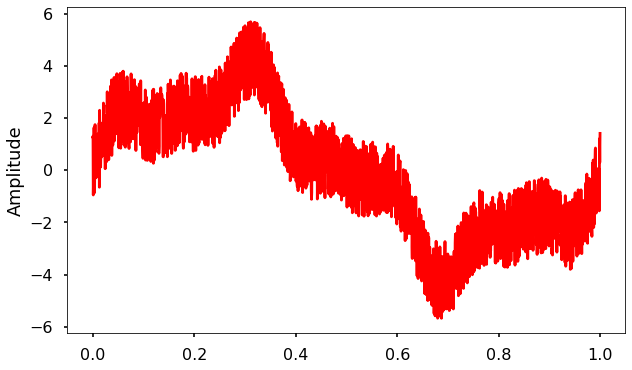

In [3]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

aux = x.copy()

random.seed(8)
noise = np.random.uniform(-1.5, 1.5, (sr))
x += noise 

plt.figure(figsize = (10, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


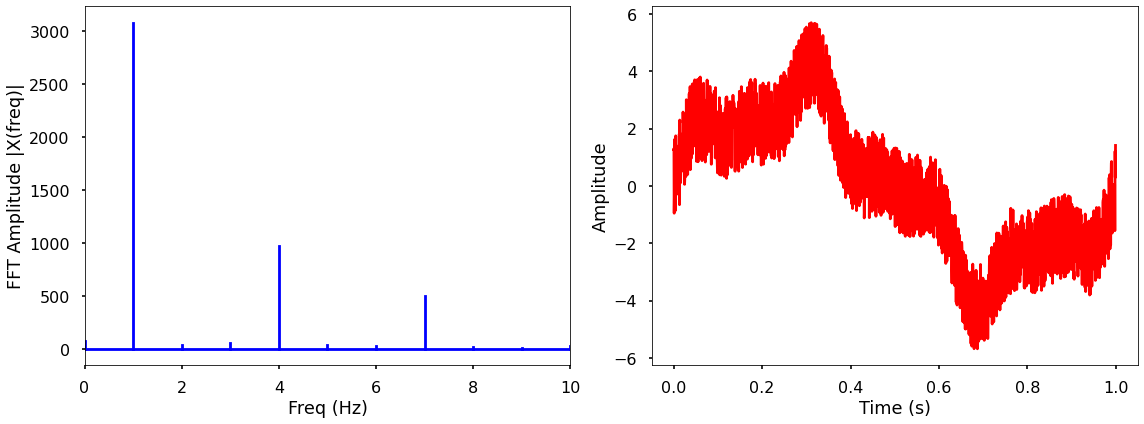

In [4]:
from numpy.fft import fft, ifft, fftshift

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (16, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


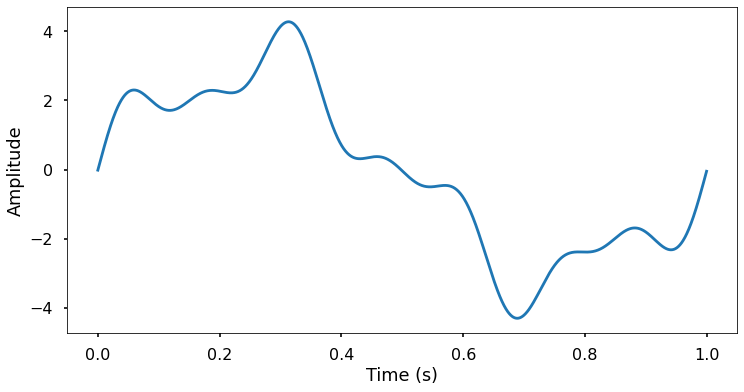

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


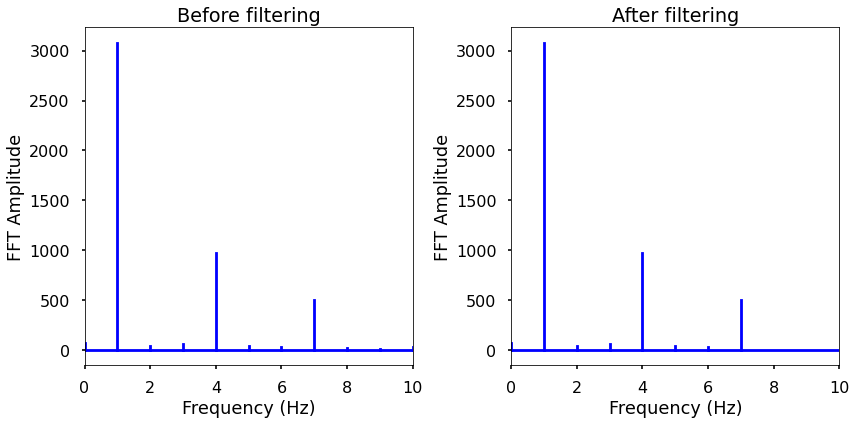

In [5]:
from scipy.fftpack import fftfreq

# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 7

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

In [6]:
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)

def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

shift = compute_shift(x,filtered)

print(shift)
print(cross_correlation_using_fft(x, filtered))

0
[-8794.35625841 -8794.25792806 -8794.09410303 ... -8794.25792806
 -8794.35625841 -8794.38904108]


In [7]:
signalCrossTemp = np.correlate(x,filtered)

signalCrossFreq = np.correlate(fft(aux),fft(x),mode='same')
print(signalCrossFreq)

[ 128484.62185372+40543.124981j     21837.11092751-94978.44222466j
 -162713.00385085 +7184.78059771j ...  235708.95997455  -672.49279362j
 -162713.00385085 -7184.78059771j   21837.11092751+94978.44222466j]


In [8]:
def calc_euclidean(actual, predic):
    return np.sqrt(np.sum((actual - predic) ** 2))

print(calc_euclidean(np.abs(x), np.abs(filtered)))

36.50019555100995


In [9]:
def calc_mape(actual, predic):
    return np.mean(np.abs((actual - predic) / actual))

print(calc_euclidean(np.abs(x), np.abs(filtered)))

36.50019555100995


In [10]:
def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)
    numerator = np.sum(a_diff * p_diff)
    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

print(calc_euclidean(np.abs(x), np.abs(filtered)))

36.50019555100995


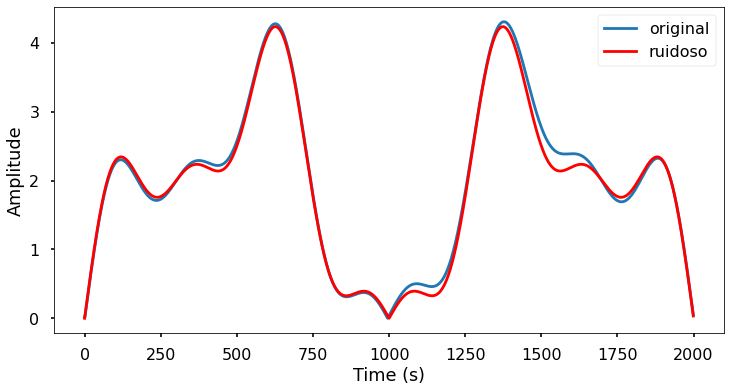

In [29]:
plt.figure(figsize = (12, 6))
plt.plot(np.abs(filtered))
plt.plot(np.abs(aux),color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(('original', 'ruidoso'), loc='best')
plt.show()

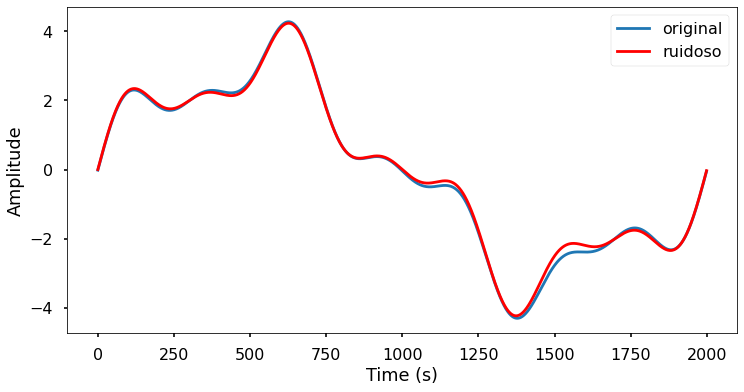

In [30]:
plt.figure(figsize = (12, 6))
plt.plot(np.real(filtered))
plt.plot(np.real(aux),color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(('original', 'ruidoso'), loc='best')
plt.show()

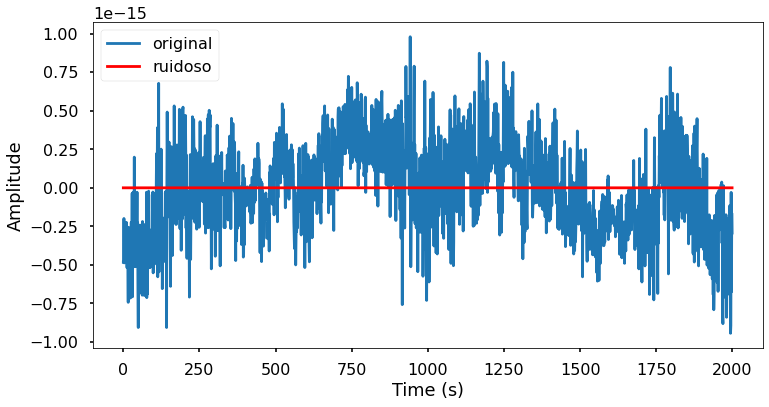

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(np.imag(filtered))
plt.plot(np.imag(aux),color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(('original', 'ruidoso'), loc='best')
plt.show()

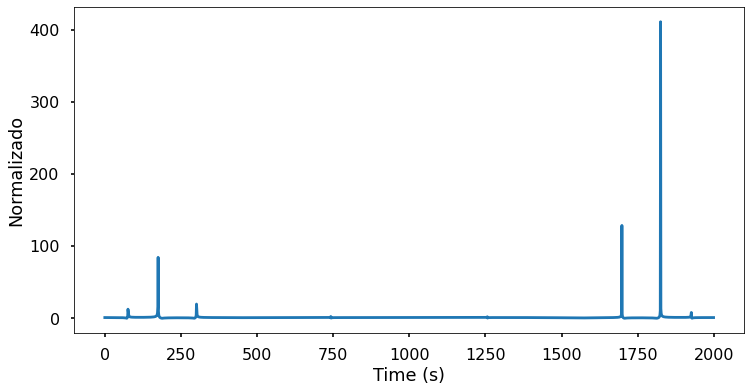

In [28]:
naux = (np.abs(aux) - np.mean(np.abs(aux)))/np.std(np.abs(aux))
nfiltered = (np.abs(filtered) - np.mean(np.abs(filtered)))/np.std(np.abs(filtered))
normalized = naux/nfiltered
normalizedi = nfiltered/naux

plt.figure(figsize = (12, 6))
plt.plot(np.abs(normalized))
plt.xlabel('Time (s)')
plt.ylabel('Normalizado')
plt.show()